In [33]:
# 方法1 

In [129]:
# 导入包
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np  
from matplotlib import pyplot as plt  

# 定义原函数 偏导x,y
def fn(x, y):
    return x*x + 6.3001*y*y - 3.44*x + 5.6224*y + 2.9584

def fnx(x,y):
    return 2*x - 3.44

def fny(x,y):
    return 2*6.3001*y + 5.6224

def model(x, y, num_iterations, learning_rate = 0.008, rate=1e-10):
#     保存迭代的数据 x,y 的值
    w=np.zeros((2,10**3))
    w[:,0] = np.array([x,y]) 
    for i in range(1,num_iterations):
#       对x,y进行迭代更新
        x_plus = x - learning_rate * fnx(x,y)
        y_plus = y - learning_rate * fny(x,y)
        w[:,i] = np.array([x_plus,y_plus])
#         结果小于rate值停止迭代
        if abs(fn(x_plus, y_plus) - fn(x,y)) < rate:
            print('iteration_times = %s , x = %s, y = %s, fn = %s' % (str(i),str(x_plus),str(y_plus),str(fn(x,y))))
            return w[:,0:i]
        x = x_plus
        y = y_plus

    print('iterate fails,pls try update your parmeters')
    return w

iteration_times = 642 , x = 1.7199452503131085, y = -0.44621513944223085, fn = -1.2543999969041986


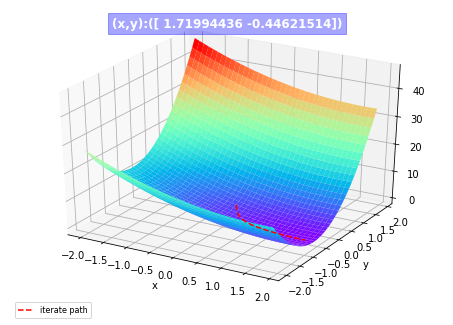

In [132]:
fig = plt.figure()   #定义figure对象 
ax = Axes3D(fig)     #定义Axes3D对象
x=np.arange(-2,2,0.1)  #x取值范围-2到2  步长为0.1
y=np.arange(-2,2,0.1)  #y取值范围-2到2  步长为0.1
X, Y = np.meshgrid(x, y) #创建网格
Z=fn(X,Y) 
plt.xlabel('x')  
plt.ylabel('y')  
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')  #绘制二元函数3D图像


# 假设初始迭代位置为(0,0)
w = model(0,0,1000)

ax.plot(w[0,:],w[1,:],fn(w[0,:],w[1,:]),'r--',label='iterate path') # 画出迭代点收敛的轨迹
# bbox_to_anchor被赋予的二元组中，第一个数值用于控制legend的左右移动，值越大越向右边移动，第二个数值用于控制legend的上下移动，值越大，越向上移动
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.title('(x,y):('+str(w[0:,-1])+')',fontweight='bold',color='white',bbox=dict(facecolor='blue', edgecolor='blue', alpha=0.35 ))  
plt.show()

In [126]:
# 方法2

In [127]:
# 在向量分析中, 雅可比矩阵是一阶偏导数以一定方式排列成的矩阵, 其行列式称为雅可比行列式
# 海森矩阵(Hessian matrix或Hessian)是一个自变量为向量的实值函数的二阶偏导数组成的方块矩阵
# 二阶导数就是判断函数局部的凹凸性。
# 此道题目涉及到多元函数求极值的问题
# f(x)=f(x1,x2,⋯,xn)　＝　x*x + 6.3001*y*y - 3.44*x + 5.6224*y + 2.9584

# 雅可比矩阵为分别对自变量求偏导数　2*x - 3.44 , 2*6.3001*y + 5.6224
# 海森矩阵在此继续球偏导数　　　　2,0
#                           0,2*6.3001


In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

def fn(x):
    return x[0]*x[0] + 6.3001*x[1]*x[1] - 3.44*x[0] + 5.6224*x[1] + 2.9584

def jacobian(x):
    return np.array([2*x[0] - 3.44,2*6.3001*x[1]+5.6224])

def hessian(x):
    return np.array([[2,0],[0,2*6.3001]])

In [136]:
def model_(x, y, num_iterations, learning_rate = 0.008, rate=1e-10):

#     保存迭代的数据 x,y 的值
    final_value , iterate_times = [],[0]
    x0 = np.array([x,y])
    w=np.zeros((2,10**3))
#     保存初始值
    w[:,0] = x0 
    x = x0
    final_value.append(fn(x))
    
    for i in range(1,num_iterations):
        p = -np.dot(np.linalg.inv(hessian(x)),jacobian(x))
        x = x0 + learning_rate*p
        w[:,i] = x
        if i % 5 == 0:
            final_value.append(fn(x))
            iterate_times.append(i)
        if sum((x-x0)**2) < rate:
            print('iteration_times = %s , x = %s, y = %s, fn = %s' % (str(i),str(x[0]),str(x[1]),str(fn(x))))
            return {
                    'w':w[:,0:i],
                    'iterate_times':iterate_times,
                    'final_value':final_value
                    }
        x0 = x
    
    print ('iterate fails,pls try update your parmeters')
    return {
             'w':w,
            'iterate_times':[],
            'final_value':NAN
            }

iteration_times = 905 , x = 1.71880162774, y = -0.445904248835, fn = -1.25439795498


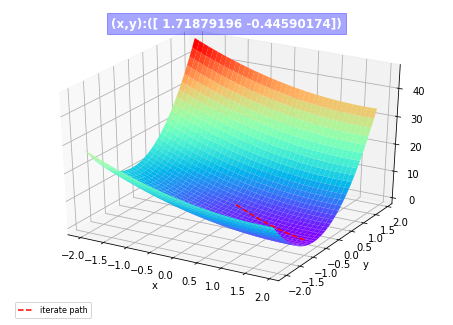

In [137]:
fig = plt.figure()   #定义figure对象 
ax = Axes3D(fig)     #定义Axes3D对象
x=np.arange(-2,2,0.1)  #x取值范围-2到2  步长为0.1
y=np.arange(-2,2,0.1)  #y取值范围-2到2  步长为0.1
X, Y = np.meshgrid(x, y) #创建网格
Z=fn([X,Y]) 
plt.xlabel('x')  
plt.ylabel('y')  
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')  #绘制二元函数3D图像

# 传入初始迭代的数值
w=model_(0,0,1000)['w']
# print(W)

ax.plot(w[0,:],w[1,:],fn([w[0,:],w[1,:]]),'r--',label='iterate path') # 画出迭代点收敛的轨迹
# bbox_to_anchor被赋予的二元组中，第一个数值用于控制legend的左右移动，值越大越向右边移动，第二个数值用于控制legend的上下移动，值越大，越向上移动
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.title('(x,y):('+str(w[0:,-1])+')',fontweight='bold',color='white',bbox=dict(facecolor='blue', edgecolor='blue', alpha=0.35 ))  
plt.show()

In [124]:
# 相对来说，对于多元函数的求极值，方法2比方法1好很多，方法2中，model_函数传入的num_iterations和learning_rate为迭代的超参数，
# 现在我们看看那不同学习率下的迭代情况

learning rate is: 0.8
iteration_times = 9 , x = 1.71999911936, y = -0.44621491098, fn = -1.2544

-------------------------------------------------------

learning rate is: 0.08
iteration_times = 116 , x = 1.71989162817, y = -0.446187024819, fn = -1.25439998328

-------------------------------------------------------

learning rate is: 0.008
iteration_times = 905 , x = 1.71880162774, y = -0.445904248835, fn = -1.25439795498

-------------------------------------------------------



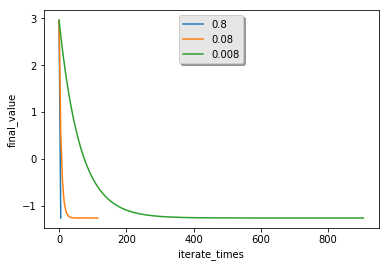

In [128]:
# 我们假设迭代初始的位置为(x,y)-(1,1),最大迭代次数为-1000
learning_rates = [0.8, 0.08, 0.008]
models = {}

# 获取不同学习率下的迭代次数和计算的数值
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model_(0, 0, num_iterations = 1000, learning_rate = i)
    print ('\n' + "-------------------------------------------------------" + '\n')

#  绘制 x轴为迭代次数 y轴为计算的最小值
for i in learning_rates:
    plt.plot(models[str(i)]["iterate_times"], models[str(i)]["final_value"],label= str(str(i)))

plt.ylabel('final_value')
plt.xlabel('iterate_times')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

# 所以可以发现当学习率为0.8，迭代次数大约9次，很快处理完毕，当学习率为0.08，迭代次数大约116次，但是大约迭代100次左右基本保持不变，
# 当学习率为0.08，迭代次数大约900次，但是可以发现大约迭代200次左右，所计算的极小值基本保持不变。所以我们可以根据图像得知基本的学习
# 率和迭代次数之间的关系，方便我们调参